In [40]:
from gensim import models
import numpy as np
import pandas as pd

import gensim, logging
from gensim import corpora

from gensim.models import Word2Vec
from gensim.models import word2vec

from sklearn.decomposition import PCA
from matplotlib import pyplot

from gensim.test.utils import datapath

from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
import logging

# Setup Logger

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Import Data

### Get corpus 

In [3]:
sentences = word2vec.Text8Corpus('text8')

# Generate Word Embbedings

### TRAIN CBOW WITH DEFAULT PARAMS

In [8]:
model = word2vec.Word2Vec(sentences, size=200)

2019-10-05 21:07:10,981 : INFO : collecting all words and their counts
2019-10-05 21:07:10,986 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-05 21:07:16,434 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2019-10-05 21:07:16,435 : INFO : Loading a fresh vocabulary
2019-10-05 21:07:16,755 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2019-10-05 21:07:16,755 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2019-10-05 21:07:16,954 : INFO : deleting the raw counts dictionary of 253854 items
2019-10-05 21:07:16,961 : INFO : sample=0.001 downsamples 38 most-common words
2019-10-05 21:07:16,962 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2019-10-05 21:07:17,192 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2019-10-05 21:07:17,192 :

2019-10-05 21:08:26,756 : INFO : EPOCH 4 - PROGRESS: at 52.79% examples, 824639 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:27,758 : INFO : EPOCH 4 - PROGRESS: at 60.02% examples, 833831 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:28,762 : INFO : EPOCH 4 - PROGRESS: at 66.55% examples, 831823 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:29,764 : INFO : EPOCH 4 - PROGRESS: at 72.84% examples, 827943 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:30,773 : INFO : EPOCH 4 - PROGRESS: at 79.42% examples, 825487 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:31,778 : INFO : EPOCH 4 - PROGRESS: at 85.66% examples, 821521 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:32,779 : INFO : EPOCH 4 - PROGRESS: at 91.89% examples, 818275 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:33,780 : INFO : EPOCH 4 - PROGRESS: at 98.88% examples, 821696 words/s, in_qsize 5, out_qsize 0
2019-10-05 21:08:33,917 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-

### Fit a 2d PCA model to the vectors

In [64]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### Plot word cloud

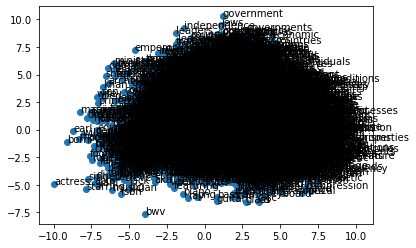

In [10]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Accuracy CBOW WITH DEFAULT PARAMS

In [11]:
model.accuracy('questions-words.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
2019-10-05 21:13:31,031 : INFO : precomputing L2-norms of word weight vectors
2019-10-05 21:13:33,003 : INFO : capital-common-countries: 37.2% (188/506)
2019-10-05 21:13:38,356 : INFO : capital-world: 20.1% (292/1452)
2019-10-05 21:13:39,359 : INFO : currency: 11.9% (32/268)
2019-10-05 21:13:45,134 : INFO : city-in-state: 11.3% (178/1571)
2019-10-05 21:13:46,260 : INFO : family: 75.5% (231/306)
2019-10-05 21:13:49,036 : INFO : gram1-adjective-to-adverb: 11.5% (87/756)
2019-10-05 21:13:50,177 : INFO : gram2-opposite: 21.2% (65/306)
2019-10-05 21:13:54,880 : INFO : gram3-comparative: 57.1% (719/1260)
2019-10-05 21:13:56,745 : INFO : gram4-superlative: 36.6% (185/506)
2019-10-05 21:14:00,617 : INFO : gram5-pr

[{'section': 'capital-common-countries',
  'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'CANBERRA', 'AUSTRALIA'),
   ('BAGHDAD', 'IRAQ', 'HANOI', 'VIETNAM'),
   ('BAGHDAD', 'IRAQ', 'HAVANA', 'CUBA'),
   ('BAGHDAD', 'IRAQ', 'HELSINKI', 'FINLAND'),
   ('BAGHDAD', 'IRAQ', 'MOSCOW', 'RUSSIA'),
   ('BAGHDAD', 'IRAQ', 'PARIS', 'FRANCE'),
   ('BAGHDAD', 'IRAQ', 'STOCKHOLM', 'SWEDEN'),
   ('BAGHDAD', 'IRAQ', 'TEHRAN', 'IRAN'),
   ('BAGHDAD', 'IRAQ', 'ATHENS', 'GREECE'),
   ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'HAVANA', 'CUBA'),
   ('BANGKOK', 'THAILAND', 'LONDON', 'ENGLAN

# TRAIN CBOW With Custom params

In [32]:
mode2 = word2vec.Word2Vec(sentences, size=200, window=8, negative=25, hs=0, sample=0.001, sg=0, iter=15)

2019-10-05 22:15:00,108 : INFO : collecting all words and their counts
2019-10-05 22:15:00,134 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-05 22:15:05,641 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2019-10-05 22:15:05,643 : INFO : Loading a fresh vocabulary
2019-10-05 22:15:07,438 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2019-10-05 22:15:07,439 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2019-10-05 22:15:07,653 : INFO : deleting the raw counts dictionary of 253854 items
2019-10-05 22:15:07,662 : INFO : sample=0.001 downsamples 38 most-common words
2019-10-05 22:15:07,663 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2019-10-05 22:15:07,930 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2019-10-05 22:15:07,931 :

2019-10-05 22:16:23,943 : INFO : EPOCH 2 - PROGRESS: at 58.14% examples, 297758 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:24,954 : INFO : EPOCH 2 - PROGRESS: at 60.85% examples, 299300 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:25,964 : INFO : EPOCH 2 - PROGRESS: at 63.55% examples, 300696 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:26,987 : INFO : EPOCH 2 - PROGRESS: at 66.37% examples, 302316 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:27,992 : INFO : EPOCH 2 - PROGRESS: at 69.02% examples, 303329 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:29,015 : INFO : EPOCH 2 - PROGRESS: at 71.66% examples, 304038 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:30,033 : INFO : EPOCH 2 - PROGRESS: at 74.31% examples, 304834 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:31,035 : INFO : EPOCH 2 - PROGRESS: at 77.01% examples, 305374 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:16:32,048 : INFO : EPOCH 2 - PROGRESS: at 79.66% examples, 305948 words/s, in_qsiz

2019-10-05 22:17:32,423 : INFO : EPOCH 4 - PROGRESS: at 30.92% examples, 270692 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:33,427 : INFO : EPOCH 4 - PROGRESS: at 33.22% examples, 271927 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:34,434 : INFO : EPOCH 4 - PROGRESS: at 35.51% examples, 272946 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:35,435 : INFO : EPOCH 4 - PROGRESS: at 37.80% examples, 273820 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:36,438 : INFO : EPOCH 4 - PROGRESS: at 40.09% examples, 274481 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:37,457 : INFO : EPOCH 4 - PROGRESS: at 42.45% examples, 275305 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:38,473 : INFO : EPOCH 4 - PROGRESS: at 44.80% examples, 276089 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:39,483 : INFO : EPOCH 4 - PROGRESS: at 47.15% examples, 276868 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:17:40,525 : INFO : EPOCH 4 - PROGRESS: at 49.50% examples, 277188 words/s, in_qsiz

2019-10-05 22:18:43,088 : INFO : EPOCH 5 - PROGRESS: at 90.53% examples, 278217 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:18:44,114 : INFO : EPOCH 5 - PROGRESS: at 92.95% examples, 278501 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:18:45,150 : INFO : EPOCH 5 - PROGRESS: at 95.24% examples, 278421 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:18:46,166 : INFO : EPOCH 5 - PROGRESS: at 97.59% examples, 278610 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:18:47,166 : INFO : EPOCH 5 - PROGRESS: at 99.82% examples, 278662 words/s, in_qsize 3, out_qsize 0
2019-10-05 22:18:47,194 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-05 22:18:47,203 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-05 22:18:47,204 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-05 22:18:47,205 : INFO : EPOCH - 5 : training on 17005207 raw words (12505513 effective words) took 44.8s, 278835 effective words/s
2019-10-05 22:18:48,21

2019-10-05 22:19:50,368 : INFO : EPOCH 7 - PROGRESS: at 43.92% examples, 284877 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:51,385 : INFO : EPOCH 7 - PROGRESS: at 46.33% examples, 285548 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:52,388 : INFO : EPOCH 7 - PROGRESS: at 48.56% examples, 285312 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:53,395 : INFO : EPOCH 7 - PROGRESS: at 50.62% examples, 284049 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:54,407 : INFO : EPOCH 7 - PROGRESS: at 52.67% examples, 282721 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:55,419 : INFO : EPOCH 7 - PROGRESS: at 54.79% examples, 281956 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:56,440 : INFO : EPOCH 7 - PROGRESS: at 57.03% examples, 281654 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:57,472 : INFO : EPOCH 7 - PROGRESS: at 59.26% examples, 281245 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:19:58,488 : INFO : EPOCH 7 - PROGRESS: at 61.43% examples, 280805 words/s, in_qsiz

2019-10-05 22:20:58,246 : INFO : EPOCH - 8 : training on 17005207 raw words (12505929 effective words) took 43.1s, 289923 effective words/s
2019-10-05 22:20:59,265 : INFO : EPOCH 9 - PROGRESS: at 2.23% examples, 277330 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:00,268 : INFO : EPOCH 9 - PROGRESS: at 4.59% examples, 284280 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:01,290 : INFO : EPOCH 9 - PROGRESS: at 7.05% examples, 287758 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:02,292 : INFO : EPOCH 9 - PROGRESS: at 9.41% examples, 289013 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:03,306 : INFO : EPOCH 9 - PROGRESS: at 11.82% examples, 290142 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:04,315 : INFO : EPOCH 9 - PROGRESS: at 14.23% examples, 291711 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:05,349 : INFO : EPOCH 9 - PROGRESS: at 16.58% examples, 290424 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:21:06,403 : INFO : EPOCH 9 - PROGRESS: at 19.05% examples, 

2019-10-05 22:22:09,417 : INFO : EPOCH 10 - PROGRESS: at 60.55% examples, 284762 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:10,422 : INFO : EPOCH 10 - PROGRESS: at 62.85% examples, 284786 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:11,433 : INFO : EPOCH 10 - PROGRESS: at 65.08% examples, 284489 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:12,435 : INFO : EPOCH 10 - PROGRESS: at 67.31% examples, 284307 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:13,445 : INFO : EPOCH 10 - PROGRESS: at 69.66% examples, 284573 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:14,493 : INFO : EPOCH 10 - PROGRESS: at 72.08% examples, 284730 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:15,498 : INFO : EPOCH 10 - PROGRESS: at 74.37% examples, 284831 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:16,501 : INFO : EPOCH 10 - PROGRESS: at 76.72% examples, 284668 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:22:17,550 : INFO : EPOCH 10 - PROGRESS: at 79.13% examples, 284626 words/s

2019-10-05 22:23:17,260 : INFO : EPOCH 12 - PROGRESS: at 7.11% examples, 290526 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:18,284 : INFO : EPOCH 12 - PROGRESS: at 9.52% examples, 291399 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:19,293 : INFO : EPOCH 12 - PROGRESS: at 11.93% examples, 292402 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:20,305 : INFO : EPOCH 12 - PROGRESS: at 14.29% examples, 292041 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:21,368 : INFO : EPOCH 12 - PROGRESS: at 16.75% examples, 291673 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:22,403 : INFO : EPOCH 12 - PROGRESS: at 18.52% examples, 281841 words/s, in_qsize 5, out_qsize 1
2019-10-05 22:23:23,415 : INFO : EPOCH 12 - PROGRESS: at 20.58% examples, 278695 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:23:24,426 : INFO : EPOCH 12 - PROGRESS: at 22.52% examples, 274945 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:23:25,431 : INFO : EPOCH 12 - PROGRESS: at 24.46% examples, 272265 words/s, 

2019-10-05 22:24:27,633 : INFO : EPOCH 13 - PROGRESS: at 59.96% examples, 284933 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:28,644 : INFO : EPOCH 13 - PROGRESS: at 62.08% examples, 284091 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:29,656 : INFO : EPOCH 13 - PROGRESS: at 64.08% examples, 282803 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:30,676 : INFO : EPOCH 13 - PROGRESS: at 66.61% examples, 283738 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:31,705 : INFO : EPOCH 13 - PROGRESS: at 68.78% examples, 283146 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:32,716 : INFO : EPOCH 13 - PROGRESS: at 71.25% examples, 283931 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:33,716 : INFO : EPOCH 13 - PROGRESS: at 73.49% examples, 283822 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:34,721 : INFO : EPOCH 13 - PROGRESS: at 75.78% examples, 283576 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:24:35,724 : INFO : EPOCH 13 - PROGRESS: at 77.78% examples, 282381 words/s

2019-10-05 22:25:35,604 : INFO : EPOCH 15 - PROGRESS: at 23.63% examples, 289103 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:25:36,647 : INFO : EPOCH 15 - PROGRESS: at 26.10% examples, 289935 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:25:37,698 : INFO : EPOCH 15 - PROGRESS: at 28.75% examples, 292327 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:25:38,751 : INFO : EPOCH 15 - PROGRESS: at 31.22% examples, 292736 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:25:39,780 : INFO : EPOCH 15 - PROGRESS: at 33.51% examples, 291951 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:25:40,800 : INFO : EPOCH 15 - PROGRESS: at 35.45% examples, 288556 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:25:41,810 : INFO : EPOCH 15 - PROGRESS: at 37.80% examples, 288807 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:25:42,822 : INFO : EPOCH 15 - PROGRESS: at 40.15% examples, 288915 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:25:43,835 : INFO : EPOCH 15 - PROGRESS: at 42.50% examples, 289083 words/s

In [33]:
mode2.accuracy('questions-words.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
2019-10-05 22:26:10,846 : INFO : precomputing L2-norms of word weight vectors
2019-10-05 22:26:13,318 : INFO : capital-common-countries: 70.0% (354/506)
2019-10-05 22:26:20,561 : INFO : capital-world: 55.0% (799/1452)
2019-10-05 22:26:21,889 : INFO : currency: 22.8% (61/268)
2019-10-05 22:26:27,480 : INFO : city-in-state: 36.7% (577/1571)
2019-10-05 22:26:28,634 : INFO : family: 78.1% (239/306)
2019-10-05 22:26:31,247 : INFO : gram1-adjective-to-adverb: 14.3% (108/756)
2019-10-05 22:26:32,343 : INFO : gram2-opposite: 24.2% (74/306)
2019-10-05 22:26:37,631 : INFO : gram3-comparative: 72.1% (908/1260)
2019-10-05 22:26:40,473 : INFO : gram4-superlative: 48.4% (245/506)
2019-10-05 22:26:44,544 : INFO : gram5-p

[{'section': 'capital-common-countries',
  'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'BERN', 'SWITZERLAND'),
   ('BAGHDAD', 'IRAQ', 'CANBERRA', '

# Training SKIPGRAM with custom params

In [35]:
model3 = word2vec.Word2Vec(sentences, size=200, window=8, negative=25, hs=0, sample=0.001, sg=1, iter=15)

2019-10-05 22:32:34,765 : INFO : collecting all words and their counts
2019-10-05 22:32:34,793 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-05 22:32:44,749 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2019-10-05 22:32:44,751 : INFO : Loading a fresh vocabulary
2019-10-05 22:32:45,210 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2019-10-05 22:32:45,212 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2019-10-05 22:32:45,594 : INFO : deleting the raw counts dictionary of 253854 items
2019-10-05 22:32:45,608 : INFO : sample=0.001 downsamples 38 most-common words
2019-10-05 22:32:45,609 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2019-10-05 22:32:45,923 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2019-10-05 22:32:45,925 :

2019-10-05 22:34:32,937 : INFO : EPOCH 1 - PROGRESS: at 17.99% examples, 27513 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:34:33,972 : INFO : EPOCH 1 - PROGRESS: at 18.28% examples, 27611 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:34:35,253 : INFO : EPOCH 1 - PROGRESS: at 18.52% examples, 27540 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:34:36,306 : INFO : EPOCH 1 - PROGRESS: at 18.81% examples, 27627 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:34:37,598 : INFO : EPOCH 1 - PROGRESS: at 19.05% examples, 27549 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:34:38,610 : INFO : EPOCH 1 - PROGRESS: at 19.28% examples, 27571 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:34:40,026 : INFO : EPOCH 1 - PROGRESS: at 19.58% examples, 27538 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:34:41,096 : INFO : EPOCH 1 - PROGRESS: at 19.81% examples, 27531 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:34:42,545 : INFO : EPOCH 1 - PROGRESS: at 20.11% examples, 27502 words/s, in_qsize 5, out_

2019-10-05 22:36:07,609 : INFO : EPOCH 1 - PROGRESS: at 33.80% examples, 24052 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:36:08,900 : INFO : EPOCH 1 - PROGRESS: at 34.04% examples, 24045 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:36:09,929 : INFO : EPOCH 1 - PROGRESS: at 34.33% examples, 24115 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:36:11,283 : INFO : EPOCH 1 - PROGRESS: at 34.57% examples, 24100 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:36:12,301 : INFO : EPOCH 1 - PROGRESS: at 34.86% examples, 24170 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:36:13,602 : INFO : EPOCH 1 - PROGRESS: at 35.10% examples, 24159 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:36:14,641 : INFO : EPOCH 1 - PROGRESS: at 35.39% examples, 24227 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:36:15,942 : INFO : EPOCH 1 - PROGRESS: at 35.63% examples, 24217 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:36:16,958 : INFO : EPOCH 1 - PROGRESS: at 35.92% examples, 24285 words/s, in_qsize 6, out_

2019-10-05 22:37:33,415 : INFO : EPOCH 1 - PROGRESS: at 57.97% examples, 27764 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:34,614 : INFO : EPOCH 1 - PROGRESS: at 58.32% examples, 27806 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:35,756 : INFO : EPOCH 1 - PROGRESS: at 58.67% examples, 27853 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:36,894 : INFO : EPOCH 1 - PROGRESS: at 59.02% examples, 27901 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:38,218 : INFO : EPOCH 1 - PROGRESS: at 59.38% examples, 27930 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:39,393 : INFO : EPOCH 1 - PROGRESS: at 59.73% examples, 27974 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:40,520 : INFO : EPOCH 1 - PROGRESS: at 60.08% examples, 28020 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:41,711 : INFO : EPOCH 1 - PROGRESS: at 60.44% examples, 28062 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:37:42,896 : INFO : EPOCH 1 - PROGRESS: at 60.79% examples, 28103 words/s, in_qsize 6, out_

2019-10-05 22:38:55,528 : INFO : EPOCH 1 - PROGRESS: at 84.07% examples, 30594 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:38:56,595 : INFO : EPOCH 1 - PROGRESS: at 84.42% examples, 30625 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:38:57,674 : INFO : EPOCH 1 - PROGRESS: at 84.77% examples, 30654 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:38:58,821 : INFO : EPOCH 1 - PROGRESS: at 85.13% examples, 30680 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:38:59,918 : INFO : EPOCH 1 - PROGRESS: at 85.48% examples, 30711 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:39:01,018 : INFO : EPOCH 1 - PROGRESS: at 85.83% examples, 30741 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:39:02,094 : INFO : EPOCH 1 - PROGRESS: at 86.18% examples, 30771 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:39:03,201 : INFO : EPOCH 1 - PROGRESS: at 86.54% examples, 30801 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:39:04,313 : INFO : EPOCH 1 - PROGRESS: at 86.89% examples, 30825 words/s, in_qsize 5, out_

2019-10-05 22:40:11,803 : INFO : EPOCH 2 - PROGRESS: at 8.64% examples, 39655 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:12,902 : INFO : EPOCH 2 - PROGRESS: at 8.99% examples, 39665 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:13,987 : INFO : EPOCH 2 - PROGRESS: at 9.35% examples, 39704 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:15,096 : INFO : EPOCH 2 - PROGRESS: at 9.70% examples, 39696 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:16,194 : INFO : EPOCH 2 - PROGRESS: at 10.05% examples, 39696 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:17,266 : INFO : EPOCH 2 - PROGRESS: at 10.41% examples, 39743 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:18,354 : INFO : EPOCH 2 - PROGRESS: at 10.76% examples, 39747 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:19,439 : INFO : EPOCH 2 - PROGRESS: at 11.11% examples, 39736 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:40:20,568 : INFO : EPOCH 2 - PROGRESS: at 11.46% examples, 39730 words/s, in_qsize 5, out_qsiz

2019-10-05 22:41:33,441 : INFO : EPOCH 2 - PROGRESS: at 34.69% examples, 39992 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:34,558 : INFO : EPOCH 2 - PROGRESS: at 35.04% examples, 39990 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:35,690 : INFO : EPOCH 2 - PROGRESS: at 35.39% examples, 39986 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:36,807 : INFO : EPOCH 2 - PROGRESS: at 35.74% examples, 39985 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:37,928 : INFO : EPOCH 2 - PROGRESS: at 36.10% examples, 39986 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:39,021 : INFO : EPOCH 2 - PROGRESS: at 36.45% examples, 39994 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:40,099 : INFO : EPOCH 2 - PROGRESS: at 36.80% examples, 39999 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:41,230 : INFO : EPOCH 2 - PROGRESS: at 37.15% examples, 39990 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:41:42,323 : INFO : EPOCH 2 - PROGRESS: at 37.51% examples, 39988 words/s, in_qsize 5, out_

2019-10-05 22:42:55,166 : INFO : EPOCH 2 - PROGRESS: at 60.79% examples, 40045 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:42:56,312 : INFO : EPOCH 2 - PROGRESS: at 61.14% examples, 40037 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:42:57,392 : INFO : EPOCH 2 - PROGRESS: at 61.49% examples, 40042 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:42:58,503 : INFO : EPOCH 2 - PROGRESS: at 61.85% examples, 40037 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:42:59,593 : INFO : EPOCH 2 - PROGRESS: at 62.20% examples, 40039 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:43:00,712 : INFO : EPOCH 2 - PROGRESS: at 62.55% examples, 40036 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:43:01,804 : INFO : EPOCH 2 - PROGRESS: at 62.90% examples, 40040 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:43:02,828 : INFO : EPOCH 2 - PROGRESS: at 63.20% examples, 40020 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:43:03,981 : INFO : EPOCH 2 - PROGRESS: at 63.55% examples, 40013 words/s, in_qsize 5, out_

2019-10-05 22:44:16,412 : INFO : EPOCH 2 - PROGRESS: at 86.95% examples, 40057 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:17,519 : INFO : EPOCH 2 - PROGRESS: at 87.30% examples, 40058 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:44:18,617 : INFO : EPOCH 2 - PROGRESS: at 87.65% examples, 40057 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:19,709 : INFO : EPOCH 2 - PROGRESS: at 88.01% examples, 40058 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:20,834 : INFO : EPOCH 2 - PROGRESS: at 88.36% examples, 40058 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:21,935 : INFO : EPOCH 2 - PROGRESS: at 88.71% examples, 40058 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:23,070 : INFO : EPOCH 2 - PROGRESS: at 89.07% examples, 40056 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:24,122 : INFO : EPOCH 2 - PROGRESS: at 89.42% examples, 40062 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:44:25,232 : INFO : EPOCH 2 - PROGRESS: at 89.77% examples, 40066 words/s, in_qsize 5, out_

2019-10-05 22:45:33,755 : INFO : EPOCH 3 - PROGRESS: at 11.82% examples, 39656 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:34,859 : INFO : EPOCH 3 - PROGRESS: at 12.17% examples, 39687 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:35,942 : INFO : EPOCH 3 - PROGRESS: at 12.52% examples, 39694 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:37,035 : INFO : EPOCH 3 - PROGRESS: at 12.87% examples, 39721 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:38,136 : INFO : EPOCH 3 - PROGRESS: at 13.23% examples, 39725 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:39,251 : INFO : EPOCH 3 - PROGRESS: at 13.58% examples, 39737 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:40,372 : INFO : EPOCH 3 - PROGRESS: at 13.93% examples, 39736 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:41,437 : INFO : EPOCH 3 - PROGRESS: at 14.29% examples, 39758 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:45:42,480 : INFO : EPOCH 3 - PROGRESS: at 14.64% examples, 39788 words/s, in_qsize 5, out_

2019-10-05 22:46:57,754 : INFO : EPOCH 3 - PROGRESS: at 37.74% examples, 39102 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:46:58,927 : INFO : EPOCH 3 - PROGRESS: at 38.10% examples, 39094 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:00,077 : INFO : EPOCH 3 - PROGRESS: at 38.45% examples, 39080 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:47:01,083 : INFO : EPOCH 3 - PROGRESS: at 38.74% examples, 39057 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:02,363 : INFO : EPOCH 3 - PROGRESS: at 39.09% examples, 39014 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:03,671 : INFO : EPOCH 3 - PROGRESS: at 39.45% examples, 38964 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:04,939 : INFO : EPOCH 3 - PROGRESS: at 39.80% examples, 38924 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:06,155 : INFO : EPOCH 3 - PROGRESS: at 40.15% examples, 38897 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:47:07,422 : INFO : EPOCH 3 - PROGRESS: at 40.51% examples, 38852 words/s, in_qsize 5, out_

2019-10-05 22:48:25,856 : INFO : EPOCH 3 - PROGRESS: at 62.79% examples, 37662 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:27,088 : INFO : EPOCH 3 - PROGRESS: at 63.14% examples, 37653 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:28,369 : INFO : EPOCH 3 - PROGRESS: at 63.49% examples, 37636 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:48:29,705 : INFO : EPOCH 3 - PROGRESS: at 63.84% examples, 37609 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:30,878 : INFO : EPOCH 3 - PROGRESS: at 64.20% examples, 37606 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:48:32,054 : INFO : EPOCH 3 - PROGRESS: at 64.55% examples, 37604 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:33,237 : INFO : EPOCH 3 - PROGRESS: at 64.90% examples, 37600 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:34,471 : INFO : EPOCH 3 - PROGRESS: at 65.26% examples, 37592 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:48:35,733 : INFO : EPOCH 3 - PROGRESS: at 65.61% examples, 37574 words/s, in_qsize 6, out_

2019-10-05 22:49:51,418 : INFO : EPOCH 3 - PROGRESS: at 87.48% examples, 37155 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:49:52,665 : INFO : EPOCH 3 - PROGRESS: at 87.83% examples, 37146 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:49:53,970 : INFO : EPOCH 3 - PROGRESS: at 88.18% examples, 37134 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:49:55,276 : INFO : EPOCH 3 - PROGRESS: at 88.54% examples, 37121 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:49:56,288 : INFO : EPOCH 3 - PROGRESS: at 88.83% examples, 37118 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:49:57,440 : INFO : EPOCH 3 - PROGRESS: at 89.12% examples, 37101 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:49:58,700 : INFO : EPOCH 3 - PROGRESS: at 89.48% examples, 37092 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:49:59,906 : INFO : EPOCH 3 - PROGRESS: at 89.83% examples, 37093 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:50:01,125 : INFO : EPOCH 3 - PROGRESS: at 90.18% examples, 37092 words/s, in_qsize 5, out_

2019-10-05 22:51:12,689 : INFO : EPOCH 4 - PROGRESS: at 12.40% examples, 40767 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:13,721 : INFO : EPOCH 4 - PROGRESS: at 12.76% examples, 40813 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:51:14,729 : INFO : EPOCH 4 - PROGRESS: at 13.11% examples, 40888 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:15,847 : INFO : EPOCH 4 - PROGRESS: at 13.46% examples, 40854 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:16,850 : INFO : EPOCH 4 - PROGRESS: at 13.76% examples, 40771 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:51:18,000 : INFO : EPOCH 4 - PROGRESS: at 14.11% examples, 40707 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:19,146 : INFO : EPOCH 4 - PROGRESS: at 14.46% examples, 40619 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:20,300 : INFO : EPOCH 4 - PROGRESS: at 14.81% examples, 40546 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:51:21,313 : INFO : EPOCH 4 - PROGRESS: at 15.17% examples, 40606 words/s, in_qsize 6, out_

2019-10-05 22:52:32,800 : INFO : EPOCH 4 - PROGRESS: at 38.51% examples, 40929 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:33,909 : INFO : EPOCH 4 - PROGRESS: at 38.92% examples, 40980 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:34,969 : INFO : EPOCH 4 - PROGRESS: at 39.27% examples, 40987 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:35,974 : INFO : EPOCH 4 - PROGRESS: at 39.56% examples, 40954 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:37,073 : INFO : EPOCH 4 - PROGRESS: at 39.92% examples, 40947 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:38,096 : INFO : EPOCH 4 - PROGRESS: at 40.27% examples, 40961 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:52:39,111 : INFO : EPOCH 4 - PROGRESS: at 40.56% examples, 40923 words/s, in_qsize 6, out_qsize 0
2019-10-05 22:52:40,152 : INFO : EPOCH 4 - PROGRESS: at 40.92% examples, 40930 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:52:41,191 : INFO : EPOCH 4 - PROGRESS: at 41.33% examples, 41002 words/s, in_qsize 5, out_

2019-10-05 22:53:51,962 : INFO : EPOCH 4 - PROGRESS: at 66.37% examples, 42238 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:53,141 : INFO : EPOCH 4 - PROGRESS: at 66.78% examples, 42249 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:54,250 : INFO : EPOCH 4 - PROGRESS: at 67.20% examples, 42272 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:55,251 : INFO : EPOCH 4 - PROGRESS: at 67.61% examples, 42319 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:56,488 : INFO : EPOCH 4 - PROGRESS: at 68.02% examples, 42318 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:57,579 : INFO : EPOCH 4 - PROGRESS: at 68.43% examples, 42345 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:58,837 : INFO : EPOCH 4 - PROGRESS: at 68.90% examples, 42376 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:53:59,958 : INFO : EPOCH 4 - PROGRESS: at 69.31% examples, 42397 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:54:01,210 : INFO : EPOCH 4 - PROGRESS: at 69.78% examples, 42422 words/s, in_qsize 5, out_

2019-10-05 22:55:13,128 : INFO : EPOCH 4 - PROGRESS: at 93.06% examples, 41855 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:14,181 : INFO : EPOCH 4 - PROGRESS: at 93.42% examples, 41852 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:15,393 : INFO : EPOCH 4 - PROGRESS: at 93.83% examples, 41849 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:16,513 : INFO : EPOCH 4 - PROGRESS: at 94.18% examples, 41844 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:17,596 : INFO : EPOCH 4 - PROGRESS: at 94.53% examples, 41838 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:18,721 : INFO : EPOCH 4 - PROGRESS: at 94.89% examples, 41828 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:19,860 : INFO : EPOCH 4 - PROGRESS: at 95.24% examples, 41816 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:20,945 : INFO : EPOCH 4 - PROGRESS: at 95.59% examples, 41814 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:55:22,042 : INFO : EPOCH 4 - PROGRESS: at 95.94% examples, 41809 words/s, in_qsize 5, out_

2019-10-05 22:56:31,384 : INFO : EPOCH 5 - PROGRESS: at 17.81% examples, 39884 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:32,502 : INFO : EPOCH 5 - PROGRESS: at 18.17% examples, 39878 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:33,600 : INFO : EPOCH 5 - PROGRESS: at 18.52% examples, 39880 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:34,682 : INFO : EPOCH 5 - PROGRESS: at 18.87% examples, 39888 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:35,769 : INFO : EPOCH 5 - PROGRESS: at 19.22% examples, 39901 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:36,831 : INFO : EPOCH 5 - PROGRESS: at 19.58% examples, 39920 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:37,927 : INFO : EPOCH 5 - PROGRESS: at 19.93% examples, 39923 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:39,004 : INFO : EPOCH 5 - PROGRESS: at 20.28% examples, 39937 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:56:40,116 : INFO : EPOCH 5 - PROGRESS: at 20.63% examples, 39946 words/s, in_qsize 5, out_

2019-10-05 22:57:53,067 : INFO : EPOCH 5 - PROGRESS: at 43.92% examples, 40098 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:54,176 : INFO : EPOCH 5 - PROGRESS: at 44.27% examples, 40098 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:55,285 : INFO : EPOCH 5 - PROGRESS: at 44.62% examples, 40101 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:56,383 : INFO : EPOCH 5 - PROGRESS: at 44.97% examples, 40100 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:57,473 : INFO : EPOCH 5 - PROGRESS: at 45.33% examples, 40108 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:58,592 : INFO : EPOCH 5 - PROGRESS: at 45.68% examples, 40107 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:57:59,686 : INFO : EPOCH 5 - PROGRESS: at 46.03% examples, 40106 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:58:00,812 : INFO : EPOCH 5 - PROGRESS: at 46.38% examples, 40104 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:58:01,915 : INFO : EPOCH 5 - PROGRESS: at 46.74% examples, 40106 words/s, in_qsize 5, out_

2019-10-05 22:59:14,333 : INFO : EPOCH 5 - PROGRESS: at 69.96% examples, 40150 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:15,448 : INFO : EPOCH 5 - PROGRESS: at 70.31% examples, 40150 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:16,563 : INFO : EPOCH 5 - PROGRESS: at 70.66% examples, 40150 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:17,677 : INFO : EPOCH 5 - PROGRESS: at 71.02% examples, 40150 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:18,805 : INFO : EPOCH 5 - PROGRESS: at 71.37% examples, 40149 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:19,894 : INFO : EPOCH 5 - PROGRESS: at 71.72% examples, 40144 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:20,995 : INFO : EPOCH 5 - PROGRESS: at 72.08% examples, 40144 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:22,062 : INFO : EPOCH 5 - PROGRESS: at 72.43% examples, 40152 words/s, in_qsize 5, out_qsize 0
2019-10-05 22:59:23,149 : INFO : EPOCH 5 - PROGRESS: at 72.78% examples, 40158 words/s, in_qsize 5, out_

2019-10-05 23:00:34,789 : INFO : EPOCH 5 - PROGRESS: at 95.94% examples, 40153 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:35,869 : INFO : EPOCH 5 - PROGRESS: at 96.30% examples, 40153 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:36,967 : INFO : EPOCH 5 - PROGRESS: at 96.65% examples, 40151 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:38,023 : INFO : EPOCH 5 - PROGRESS: at 97.00% examples, 40152 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:39,144 : INFO : EPOCH 5 - PROGRESS: at 97.35% examples, 40149 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:40,205 : INFO : EPOCH 5 - PROGRESS: at 97.71% examples, 40150 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:41,322 : INFO : EPOCH 5 - PROGRESS: at 98.06% examples, 40147 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:42,391 : INFO : EPOCH 5 - PROGRESS: at 98.41% examples, 40148 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:00:43,506 : INFO : EPOCH 5 - PROGRESS: at 98.77% examples, 40147 words/s, in_qsize 5, out_

2019-10-05 23:01:51,222 : INFO : EPOCH 6 - PROGRESS: at 20.63% examples, 40089 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:52,326 : INFO : EPOCH 6 - PROGRESS: at 20.99% examples, 40091 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:53,427 : INFO : EPOCH 6 - PROGRESS: at 21.34% examples, 40096 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:54,509 : INFO : EPOCH 6 - PROGRESS: at 21.69% examples, 40109 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:55,594 : INFO : EPOCH 6 - PROGRESS: at 22.05% examples, 40115 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:56,692 : INFO : EPOCH 6 - PROGRESS: at 22.40% examples, 40114 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:57,826 : INFO : EPOCH 6 - PROGRESS: at 22.75% examples, 40107 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:01:58,970 : INFO : EPOCH 6 - PROGRESS: at 23.10% examples, 40100 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:02:00,091 : INFO : EPOCH 6 - PROGRESS: at 23.46% examples, 40099 words/s, in_qsize 5, out_

2019-10-05 23:03:13,221 : INFO : EPOCH 6 - PROGRESS: at 46.74% examples, 40110 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:03:14,296 : INFO : EPOCH 6 - PROGRESS: at 47.09% examples, 40118 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:15,404 : INFO : EPOCH 6 - PROGRESS: at 47.44% examples, 40117 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:16,504 : INFO : EPOCH 6 - PROGRESS: at 47.80% examples, 40117 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:17,614 : INFO : EPOCH 6 - PROGRESS: at 48.15% examples, 40118 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:18,726 : INFO : EPOCH 6 - PROGRESS: at 48.50% examples, 40114 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:19,811 : INFO : EPOCH 6 - PROGRESS: at 48.85% examples, 40117 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:20,909 : INFO : EPOCH 6 - PROGRESS: at 49.21% examples, 40123 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:03:22,022 : INFO : EPOCH 6 - PROGRESS: at 49.56% examples, 40121 words/s, in_qsize 5, out_

2019-10-05 23:04:35,481 : INFO : EPOCH 6 - PROGRESS: at 72.78% examples, 39972 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:36,598 : INFO : EPOCH 6 - PROGRESS: at 73.13% examples, 39973 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:37,764 : INFO : EPOCH 6 - PROGRESS: at 73.49% examples, 39963 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:38,869 : INFO : EPOCH 6 - PROGRESS: at 73.84% examples, 39963 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:04:40,051 : INFO : EPOCH 6 - PROGRESS: at 74.19% examples, 39952 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:41,142 : INFO : EPOCH 6 - PROGRESS: at 74.54% examples, 39951 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:42,178 : INFO : EPOCH 6 - PROGRESS: at 74.90% examples, 39956 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:43,201 : INFO : EPOCH 6 - PROGRESS: at 75.25% examples, 39952 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:04:44,285 : INFO : EPOCH 6 - PROGRESS: at 75.60% examples, 39941 words/s, in_qsize 5, out_

2019-10-05 23:05:56,833 : INFO : EPOCH 6 - PROGRESS: at 98.94% examples, 39955 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:05:57,944 : INFO : EPOCH 6 - PROGRESS: at 99.29% examples, 39955 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:05:59,123 : INFO : EPOCH 6 - PROGRESS: at 99.65% examples, 39950 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:05:59,726 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-05 23:05:59,831 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-05 23:05:59,944 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-05 23:05:59,945 : INFO : EPOCH - 6 : training on 17005207 raw words (12504698 effective words) took 312.8s, 39976 effective words/s
2019-10-05 23:06:01,074 : INFO : EPOCH 7 - PROGRESS: at 0.24% examples, 26861 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:06:02,180 : INFO : EPOCH 7 - PROGRESS: at 0.59% examples, 33647 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:06:03,281 : INF

2019-10-05 23:07:14,118 : INFO : EPOCH 7 - PROGRESS: at 23.87% examples, 40167 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:15,212 : INFO : EPOCH 7 - PROGRESS: at 24.22% examples, 40166 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:16,368 : INFO : EPOCH 7 - PROGRESS: at 24.57% examples, 40123 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:17,569 : INFO : EPOCH 7 - PROGRESS: at 24.93% examples, 40063 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:18,803 : INFO : EPOCH 7 - PROGRESS: at 25.28% examples, 40007 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:19,991 : INFO : EPOCH 7 - PROGRESS: at 25.63% examples, 39979 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:21,205 : INFO : EPOCH 7 - PROGRESS: at 25.98% examples, 39938 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:22,347 : INFO : EPOCH 7 - PROGRESS: at 26.34% examples, 39919 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:07:23,566 : INFO : EPOCH 7 - PROGRESS: at 26.69% examples, 39870 words/s, in_qsize 5, out_

2019-10-05 23:08:39,265 : INFO : EPOCH 7 - PROGRESS: at 50.56% examples, 39799 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:40,504 : INFO : EPOCH 7 - PROGRESS: at 50.91% examples, 39768 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:41,700 : INFO : EPOCH 7 - PROGRESS: at 51.26% examples, 39740 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:08:42,958 : INFO : EPOCH 7 - PROGRESS: at 51.62% examples, 39702 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:44,182 : INFO : EPOCH 7 - PROGRESS: at 51.97% examples, 39672 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:45,392 : INFO : EPOCH 7 - PROGRESS: at 52.32% examples, 39648 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:46,646 : INFO : EPOCH 7 - PROGRESS: at 52.67% examples, 39619 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:47,881 : INFO : EPOCH 7 - PROGRESS: at 53.03% examples, 39603 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:08:49,170 : INFO : EPOCH 7 - PROGRESS: at 53.38% examples, 39559 words/s, in_qsize 6, out_

2019-10-05 23:10:07,681 : INFO : EPOCH 7 - PROGRESS: at 76.31% examples, 38593 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:08,820 : INFO : EPOCH 7 - PROGRESS: at 76.66% examples, 38583 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:10,070 : INFO : EPOCH 7 - PROGRESS: at 77.01% examples, 38561 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:11,401 : INFO : EPOCH 7 - PROGRESS: at 77.37% examples, 38527 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:12,671 : INFO : EPOCH 7 - PROGRESS: at 77.72% examples, 38506 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:13,867 : INFO : EPOCH 7 - PROGRESS: at 78.07% examples, 38495 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:15,090 : INFO : EPOCH 7 - PROGRESS: at 78.42% examples, 38485 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:10:16,264 : INFO : EPOCH 7 - PROGRESS: at 78.78% examples, 38481 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:10:17,406 : INFO : EPOCH 7 - PROGRESS: at 79.13% examples, 38480 words/s, in_qsize 5, out_

2019-10-05 23:11:28,002 : INFO : EPOCH 8 - PROGRESS: at 0.94% examples, 32032 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:29,012 : INFO : EPOCH 8 - PROGRESS: at 1.29% examples, 34468 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:30,035 : INFO : EPOCH 8 - PROGRESS: at 1.65% examples, 36007 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:31,209 : INFO : EPOCH 8 - PROGRESS: at 2.00% examples, 36323 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:32,252 : INFO : EPOCH 8 - PROGRESS: at 2.35% examples, 37137 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:33,285 : INFO : EPOCH 8 - PROGRESS: at 2.76% examples, 38626 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:34,337 : INFO : EPOCH 8 - PROGRESS: at 3.12% examples, 38978 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:35,457 : INFO : EPOCH 8 - PROGRESS: at 3.41% examples, 38272 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:11:36,568 : INFO : EPOCH 8 - PROGRESS: at 3.76% examples, 38353 words/s, in_qsize 6, out_qsize 0
2

2019-10-05 23:12:50,137 : INFO : EPOCH 8 - PROGRESS: at 27.16% examples, 39512 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:51,254 : INFO : EPOCH 8 - PROGRESS: at 27.51% examples, 39525 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:52,326 : INFO : EPOCH 8 - PROGRESS: at 27.87% examples, 39557 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:53,410 : INFO : EPOCH 8 - PROGRESS: at 28.22% examples, 39575 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:54,482 : INFO : EPOCH 8 - PROGRESS: at 28.57% examples, 39597 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:55,527 : INFO : EPOCH 8 - PROGRESS: at 28.87% examples, 39551 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:56,581 : INFO : EPOCH 8 - PROGRESS: at 29.22% examples, 39582 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:57,664 : INFO : EPOCH 8 - PROGRESS: at 29.57% examples, 39617 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:12:58,703 : INFO : EPOCH 8 - PROGRESS: at 29.92% examples, 39651 words/s, in_qsize 5, out_

2019-10-05 23:14:10,207 : INFO : EPOCH 8 - PROGRESS: at 53.56% examples, 40480 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:11,256 : INFO : EPOCH 8 - PROGRESS: at 53.91% examples, 40492 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:12,314 : INFO : EPOCH 8 - PROGRESS: at 54.26% examples, 40508 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:13,337 : INFO : EPOCH 8 - PROGRESS: at 54.61% examples, 40527 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:14,368 : INFO : EPOCH 8 - PROGRESS: at 54.97% examples, 40537 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:15,412 : INFO : EPOCH 8 - PROGRESS: at 55.32% examples, 40550 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:16,467 : INFO : EPOCH 8 - PROGRESS: at 55.67% examples, 40560 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:17,491 : INFO : EPOCH 8 - PROGRESS: at 56.03% examples, 40580 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:14:18,551 : INFO : EPOCH 8 - PROGRESS: at 56.50% examples, 40667 words/s, in_qsize 5, out_

2019-10-05 23:15:32,760 : INFO : EPOCH 8 - PROGRESS: at 84.19% examples, 42403 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:33,979 : INFO : EPOCH 8 - PROGRESS: at 84.60% examples, 42398 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:34,996 : INFO : EPOCH 8 - PROGRESS: at 85.01% examples, 42430 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:36,316 : INFO : EPOCH 8 - PROGRESS: at 85.48% examples, 42442 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:37,351 : INFO : EPOCH 8 - PROGRESS: at 85.89% examples, 42475 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:38,618 : INFO : EPOCH 8 - PROGRESS: at 86.36% examples, 42494 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:39,627 : INFO : EPOCH 8 - PROGRESS: at 86.83% examples, 42549 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:40,950 : INFO : EPOCH 8 - PROGRESS: at 87.24% examples, 42534 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:15:41,962 : INFO : EPOCH 8 - PROGRESS: at 87.65% examples, 42565 words/s, in_qsize 5, out_

2019-10-05 23:16:52,421 : INFO : EPOCH 9 - PROGRESS: at 14.29% examples, 46827 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:16:53,797 : INFO : EPOCH 9 - PROGRESS: at 14.81% examples, 46841 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:16:55,204 : INFO : EPOCH 9 - PROGRESS: at 15.34% examples, 46846 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:16:56,600 : INFO : EPOCH 9 - PROGRESS: at 15.87% examples, 46871 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:16:57,974 : INFO : EPOCH 9 - PROGRESS: at 16.40% examples, 46899 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:16:59,400 : INFO : EPOCH 9 - PROGRESS: at 16.93% examples, 46893 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:17:00,821 : INFO : EPOCH 9 - PROGRESS: at 17.46% examples, 46898 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:17:01,822 : INFO : EPOCH 9 - PROGRESS: at 17.93% examples, 47154 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:17:03,150 : INFO : EPOCH 9 - PROGRESS: at 18.34% examples, 46917 words/s, in_qsize 5, out_

2019-10-05 23:18:21,359 : INFO : EPOCH 9 - PROGRESS: at 47.85% examples, 47301 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:22,665 : INFO : EPOCH 9 - PROGRESS: at 48.27% examples, 47224 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:23,730 : INFO : EPOCH 9 - PROGRESS: at 48.74% examples, 47292 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:24,985 : INFO : EPOCH 9 - PROGRESS: at 49.15% examples, 47235 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:26,071 : INFO : EPOCH 9 - PROGRESS: at 49.62% examples, 47292 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:27,274 : INFO : EPOCH 9 - PROGRESS: at 50.03% examples, 47255 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:28,300 : INFO : EPOCH 9 - PROGRESS: at 50.44% examples, 47279 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:29,454 : INFO : EPOCH 9 - PROGRESS: at 50.85% examples, 47261 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:18:30,623 : INFO : EPOCH 9 - PROGRESS: at 51.26% examples, 47225 words/s, in_qsize 5, out_

2019-10-05 23:19:43,906 : INFO : EPOCH 9 - PROGRESS: at 78.95% examples, 47210 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:44,946 : INFO : EPOCH 9 - PROGRESS: at 79.37% examples, 47220 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:46,149 : INFO : EPOCH 9 - PROGRESS: at 79.78% examples, 47195 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:47,226 : INFO : EPOCH 9 - PROGRESS: at 80.25% examples, 47228 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:48,462 : INFO : EPOCH 9 - PROGRESS: at 80.66% examples, 47197 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:49,526 : INFO : EPOCH 9 - PROGRESS: at 81.13% examples, 47234 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:50,772 : INFO : EPOCH 9 - PROGRESS: at 81.54% examples, 47199 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:19:51,819 : INFO : EPOCH 9 - PROGRESS: at 82.01% examples, 47241 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:19:53,040 : INFO : EPOCH 9 - PROGRESS: at 82.42% examples, 47210 words/s, in_qsize 5, out_

2019-10-05 23:21:04,680 : INFO : EPOCH 10 - PROGRESS: at 9.76% examples, 47208 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:05,782 : INFO : EPOCH 10 - PROGRESS: at 10.23% examples, 47448 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:06,982 : INFO : EPOCH 10 - PROGRESS: at 10.64% examples, 47233 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:08,054 : INFO : EPOCH 10 - PROGRESS: at 11.11% examples, 47452 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:09,255 : INFO : EPOCH 10 - PROGRESS: at 11.52% examples, 47281 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:10,450 : INFO : EPOCH 10 - PROGRESS: at 11.99% examples, 47396 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:11,579 : INFO : EPOCH 10 - PROGRESS: at 12.40% examples, 47323 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:12,768 : INFO : EPOCH 10 - PROGRESS: at 12.87% examples, 47394 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:21:13,901 : INFO : EPOCH 10 - PROGRESS: at 13.29% examples, 47327 words/s, in_qsize

2019-10-05 23:22:26,614 : INFO : EPOCH 10 - PROGRESS: at 40.86% examples, 47596 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:27,726 : INFO : EPOCH 10 - PROGRESS: at 41.27% examples, 47580 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:28,963 : INFO : EPOCH 10 - PROGRESS: at 41.74% examples, 47587 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:30,116 : INFO : EPOCH 10 - PROGRESS: at 42.15% examples, 47562 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:31,343 : INFO : EPOCH 10 - PROGRESS: at 42.62% examples, 47575 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:32,449 : INFO : EPOCH 10 - PROGRESS: at 43.03% examples, 47570 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:33,616 : INFO : EPOCH 10 - PROGRESS: at 43.50% examples, 47586 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:34,698 : INFO : EPOCH 10 - PROGRESS: at 43.92% examples, 47586 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:22:35,968 : INFO : EPOCH 10 - PROGRESS: at 44.39% examples, 47576 words/s, in_qsiz

2019-10-05 23:23:49,320 : INFO : EPOCH 10 - PROGRESS: at 72.19% examples, 47584 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:50,621 : INFO : EPOCH 10 - PROGRESS: at 72.60% examples, 47531 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:51,639 : INFO : EPOCH 10 - PROGRESS: at 73.02% examples, 47553 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:52,983 : INFO : EPOCH 10 - PROGRESS: at 73.49% examples, 47528 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:54,013 : INFO : EPOCH 10 - PROGRESS: at 73.90% examples, 47542 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:55,305 : INFO : EPOCH 10 - PROGRESS: at 74.37% examples, 47531 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:56,321 : INFO : EPOCH 10 - PROGRESS: at 74.84% examples, 47577 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:57,505 : INFO : EPOCH 10 - PROGRESS: at 75.25% examples, 47526 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:23:58,841 : INFO : EPOCH 10 - PROGRESS: at 75.78% examples, 47519 words/s, in_qsiz

2019-10-05 23:25:08,567 : INFO : EPOCH 11 - PROGRESS: at 2.00% examples, 38378 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:09,656 : INFO : EPOCH 11 - PROGRESS: at 2.35% examples, 38724 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:10,732 : INFO : EPOCH 11 - PROGRESS: at 2.70% examples, 39041 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:25:11,798 : INFO : EPOCH 11 - PROGRESS: at 3.06% examples, 39328 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:12,821 : INFO : EPOCH 11 - PROGRESS: at 3.41% examples, 39573 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:13,900 : INFO : EPOCH 11 - PROGRESS: at 3.76% examples, 39641 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:14,986 : INFO : EPOCH 11 - PROGRESS: at 4.12% examples, 39755 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:16,064 : INFO : EPOCH 11 - PROGRESS: at 4.47% examples, 39800 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:25:17,136 : INFO : EPOCH 11 - PROGRESS: at 4.82% examples, 39831 words/s, in_qsize 5, out_

2019-10-05 23:26:27,492 : INFO : EPOCH 11 - PROGRESS: at 27.63% examples, 40383 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:28,625 : INFO : EPOCH 11 - PROGRESS: at 27.98% examples, 40370 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:29,730 : INFO : EPOCH 11 - PROGRESS: at 28.34% examples, 40368 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:30,849 : INFO : EPOCH 11 - PROGRESS: at 28.69% examples, 40363 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:31,985 : INFO : EPOCH 11 - PROGRESS: at 29.04% examples, 40346 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:33,055 : INFO : EPOCH 11 - PROGRESS: at 29.39% examples, 40360 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:34,177 : INFO : EPOCH 11 - PROGRESS: at 29.75% examples, 40371 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:35,256 : INFO : EPOCH 11 - PROGRESS: at 30.10% examples, 40380 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:26:36,338 : INFO : EPOCH 11 - PROGRESS: at 30.45% examples, 40386 words/s, in_qsiz

2019-10-05 23:27:47,689 : INFO : EPOCH 11 - PROGRESS: at 53.38% examples, 40405 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:48,798 : INFO : EPOCH 11 - PROGRESS: at 53.73% examples, 40401 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:49,933 : INFO : EPOCH 11 - PROGRESS: at 54.09% examples, 40397 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:51,055 : INFO : EPOCH 11 - PROGRESS: at 54.44% examples, 40396 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:52,120 : INFO : EPOCH 11 - PROGRESS: at 54.79% examples, 40398 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:53,237 : INFO : EPOCH 11 - PROGRESS: at 55.14% examples, 40393 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:54,347 : INFO : EPOCH 11 - PROGRESS: at 55.50% examples, 40393 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:55,428 : INFO : EPOCH 11 - PROGRESS: at 55.85% examples, 40398 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:27:56,523 : INFO : EPOCH 11 - PROGRESS: at 56.20% examples, 40403 words/s, in_qsiz

2019-10-05 23:29:09,997 : INFO : EPOCH 11 - PROGRESS: at 78.78% examples, 39772 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:29:11,190 : INFO : EPOCH 11 - PROGRESS: at 79.13% examples, 39757 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:29:12,374 : INFO : EPOCH 11 - PROGRESS: at 79.48% examples, 39745 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:29:13,503 : INFO : EPOCH 11 - PROGRESS: at 79.84% examples, 39741 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:29:14,685 : INFO : EPOCH 11 - PROGRESS: at 80.19% examples, 39726 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:29:15,875 : INFO : EPOCH 11 - PROGRESS: at 80.54% examples, 39715 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:29:16,876 : INFO : EPOCH 11 - PROGRESS: at 80.83% examples, 39703 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:29:18,041 : INFO : EPOCH 11 - PROGRESS: at 81.19% examples, 39692 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:29:19,189 : INFO : EPOCH 11 - PROGRESS: at 81.54% examples, 39685 words/s, in_qsiz

2019-10-05 23:30:26,392 : INFO : EPOCH 12 - PROGRESS: at 3.47% examples, 40948 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:27,393 : INFO : EPOCH 12 - PROGRESS: at 3.76% examples, 40529 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:28,606 : INFO : EPOCH 12 - PROGRESS: at 4.12% examples, 40164 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:30:29,758 : INFO : EPOCH 12 - PROGRESS: at 4.47% examples, 39954 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:30:30,903 : INFO : EPOCH 12 - PROGRESS: at 4.82% examples, 39789 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:31,930 : INFO : EPOCH 12 - PROGRESS: at 5.17% examples, 39995 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:32,973 : INFO : EPOCH 12 - PROGRESS: at 5.64% examples, 40866 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:34,370 : INFO : EPOCH 12 - PROGRESS: at 6.06% examples, 40466 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:30:35,381 : INFO : EPOCH 12 - PROGRESS: at 6.41% examples, 40531 words/s, in_qsize 5, out_

2019-10-05 23:31:44,687 : INFO : EPOCH 12 - PROGRESS: at 29.28% examples, 41153 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:45,792 : INFO : EPOCH 12 - PROGRESS: at 29.63% examples, 41162 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:31:46,857 : INFO : EPOCH 12 - PROGRESS: at 29.98% examples, 41165 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:47,972 : INFO : EPOCH 12 - PROGRESS: at 30.34% examples, 41150 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:31:49,142 : INFO : EPOCH 12 - PROGRESS: at 30.75% examples, 41193 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:50,201 : INFO : EPOCH 12 - PROGRESS: at 31.10% examples, 41203 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:51,294 : INFO : EPOCH 12 - PROGRESS: at 31.45% examples, 41200 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:52,377 : INFO : EPOCH 12 - PROGRESS: at 31.80% examples, 41195 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:31:53,472 : INFO : EPOCH 12 - PROGRESS: at 32.16% examples, 41193 words/s, in_qsiz

2019-10-05 23:33:05,139 : INFO : EPOCH 12 - PROGRESS: at 55.50% examples, 41095 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:06,309 : INFO : EPOCH 12 - PROGRESS: at 55.85% examples, 41074 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:07,448 : INFO : EPOCH 12 - PROGRESS: at 56.20% examples, 41064 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:08,565 : INFO : EPOCH 12 - PROGRESS: at 56.55% examples, 41047 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:09,719 : INFO : EPOCH 12 - PROGRESS: at 56.91% examples, 41025 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:33:10,909 : INFO : EPOCH 12 - PROGRESS: at 57.26% examples, 40999 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:12,103 : INFO : EPOCH 12 - PROGRESS: at 57.61% examples, 40970 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:13,243 : INFO : EPOCH 12 - PROGRESS: at 57.97% examples, 40957 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:33:14,407 : INFO : EPOCH 12 - PROGRESS: at 58.32% examples, 40938 words/s, in_qsiz

2019-10-05 23:34:27,771 : INFO : EPOCH 12 - PROGRESS: at 82.13% examples, 40787 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:28,778 : INFO : EPOCH 12 - PROGRESS: at 82.48% examples, 40797 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:29,793 : INFO : EPOCH 12 - PROGRESS: at 82.83% examples, 40807 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:30,834 : INFO : EPOCH 12 - PROGRESS: at 83.19% examples, 40816 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:31,847 : INFO : EPOCH 12 - PROGRESS: at 83.54% examples, 40831 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:32,886 : INFO : EPOCH 12 - PROGRESS: at 83.89% examples, 40840 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:33,900 : INFO : EPOCH 12 - PROGRESS: at 84.30% examples, 40877 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:34,904 : INFO : EPOCH 12 - PROGRESS: at 84.66% examples, 40885 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:34:35,939 : INFO : EPOCH 12 - PROGRESS: at 85.01% examples, 40891 words/s, in_qsiz

2019-10-05 23:35:45,521 : INFO : EPOCH 13 - PROGRESS: at 10.29% examples, 46796 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:46,755 : INFO : EPOCH 13 - PROGRESS: at 10.76% examples, 46801 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:47,824 : INFO : EPOCH 13 - PROGRESS: at 11.17% examples, 46801 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:49,138 : INFO : EPOCH 13 - PROGRESS: at 11.64% examples, 46748 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:50,152 : INFO : EPOCH 13 - PROGRESS: at 12.05% examples, 46889 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:51,500 : INFO : EPOCH 13 - PROGRESS: at 12.52% examples, 46743 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:52,550 : INFO : EPOCH 13 - PROGRESS: at 12.99% examples, 47025 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:35:53,839 : INFO : EPOCH 13 - PROGRESS: at 13.40% examples, 46769 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:35:54,910 : INFO : EPOCH 13 - PROGRESS: at 13.87% examples, 47031 words/s, in_qsiz

2019-10-05 23:37:10,551 : INFO : EPOCH 13 - PROGRESS: at 41.98% examples, 46839 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:11,665 : INFO : EPOCH 13 - PROGRESS: at 42.45% examples, 46903 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:12,944 : INFO : EPOCH 13 - PROGRESS: at 42.86% examples, 46838 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:14,045 : INFO : EPOCH 13 - PROGRESS: at 43.33% examples, 46896 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:15,271 : INFO : EPOCH 13 - PROGRESS: at 43.74% examples, 46839 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:16,301 : INFO : EPOCH 13 - PROGRESS: at 44.15% examples, 46867 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:17,365 : INFO : EPOCH 13 - PROGRESS: at 44.56% examples, 46888 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:18,624 : INFO : EPOCH 13 - PROGRESS: at 44.97% examples, 46831 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:37:19,769 : INFO : EPOCH 13 - PROGRESS: at 45.44% examples, 46870 words/s, in_qsiz

2019-10-05 23:38:35,482 : INFO : EPOCH 13 - PROGRESS: at 73.66% examples, 46849 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:36,588 : INFO : EPOCH 13 - PROGRESS: at 74.07% examples, 46848 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:37,822 : INFO : EPOCH 13 - PROGRESS: at 74.54% examples, 46850 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:38,859 : INFO : EPOCH 13 - PROGRESS: at 75.01% examples, 46886 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:40,023 : INFO : EPOCH 13 - PROGRESS: at 75.43% examples, 46849 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:41,364 : INFO : EPOCH 13 - PROGRESS: at 75.96% examples, 46850 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:42,382 : INFO : EPOCH 13 - PROGRESS: at 76.43% examples, 46897 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:38:43,605 : INFO : EPOCH 13 - PROGRESS: at 76.84% examples, 46857 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:38:44,680 : INFO : EPOCH 13 - PROGRESS: at 77.31% examples, 46889 words/s, in_qsiz

2019-10-05 23:39:52,613 : INFO : EPOCH 14 - PROGRESS: at 2.35% examples, 38806 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:53,714 : INFO : EPOCH 14 - PROGRESS: at 2.70% examples, 38994 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:54,800 : INFO : EPOCH 14 - PROGRESS: at 3.06% examples, 39214 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:55,846 : INFO : EPOCH 14 - PROGRESS: at 3.41% examples, 39392 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:56,926 : INFO : EPOCH 14 - PROGRESS: at 3.76% examples, 39471 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:58,022 : INFO : EPOCH 14 - PROGRESS: at 4.12% examples, 39572 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:39:59,121 : INFO : EPOCH 14 - PROGRESS: at 4.47% examples, 39571 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:40:00,227 : INFO : EPOCH 14 - PROGRESS: at 4.82% examples, 39537 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:40:01,334 : INFO : EPOCH 14 - PROGRESS: at 5.17% examples, 39571 words/s, in_qsize 5, out_

2019-10-05 23:41:13,294 : INFO : EPOCH 14 - PROGRESS: at 27.98% examples, 39595 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:14,386 : INFO : EPOCH 14 - PROGRESS: at 28.34% examples, 39609 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:15,474 : INFO : EPOCH 14 - PROGRESS: at 28.69% examples, 39627 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:16,564 : INFO : EPOCH 14 - PROGRESS: at 29.04% examples, 39641 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:17,665 : INFO : EPOCH 14 - PROGRESS: at 29.39% examples, 39650 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:18,848 : INFO : EPOCH 14 - PROGRESS: at 29.75% examples, 39642 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:19,964 : INFO : EPOCH 14 - PROGRESS: at 30.10% examples, 39642 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:21,092 : INFO : EPOCH 14 - PROGRESS: at 30.45% examples, 39637 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:41:22,336 : INFO : EPOCH 14 - PROGRESS: at 30.81% examples, 39592 words/s, in_qsiz

2019-10-05 23:42:36,381 : INFO : EPOCH 14 - PROGRESS: at 53.62% examples, 39217 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:37,483 : INFO : EPOCH 14 - PROGRESS: at 53.97% examples, 39226 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:38,612 : INFO : EPOCH 14 - PROGRESS: at 54.32% examples, 39233 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:39,717 : INFO : EPOCH 14 - PROGRESS: at 54.67% examples, 39235 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:40,821 : INFO : EPOCH 14 - PROGRESS: at 55.03% examples, 39240 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:41,935 : INFO : EPOCH 14 - PROGRESS: at 55.38% examples, 39246 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:43,051 : INFO : EPOCH 14 - PROGRESS: at 55.73% examples, 39250 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:44,165 : INFO : EPOCH 14 - PROGRESS: at 56.08% examples, 39258 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:42:45,238 : INFO : EPOCH 14 - PROGRESS: at 56.44% examples, 39265 words/s, in_qsiz

2019-10-05 23:43:57,256 : INFO : EPOCH 14 - PROGRESS: at 79.37% examples, 39376 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:43:58,361 : INFO : EPOCH 14 - PROGRESS: at 79.72% examples, 39379 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:43:59,426 : INFO : EPOCH 14 - PROGRESS: at 80.07% examples, 39384 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:00,623 : INFO : EPOCH 14 - PROGRESS: at 80.42% examples, 39372 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:01,913 : INFO : EPOCH 14 - PROGRESS: at 80.78% examples, 39347 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:03,120 : INFO : EPOCH 14 - PROGRESS: at 81.13% examples, 39331 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:04,221 : INFO : EPOCH 14 - PROGRESS: at 81.48% examples, 39334 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:05,339 : INFO : EPOCH 14 - PROGRESS: at 81.83% examples, 39334 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:44:06,605 : INFO : EPOCH 14 - PROGRESS: at 82.19% examples, 39310 words/s, in_qsiz

2019-10-05 23:45:21,296 : INFO : EPOCH 15 - PROGRESS: at 1.82% examples, 25633 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:22,398 : INFO : EPOCH 15 - PROGRESS: at 2.18% examples, 27265 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:23,516 : INFO : EPOCH 15 - PROGRESS: at 2.53% examples, 28489 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:24,605 : INFO : EPOCH 15 - PROGRESS: at 2.88% examples, 29584 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:25,620 : INFO : EPOCH 15 - PROGRESS: at 3.23% examples, 30557 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:26,728 : INFO : EPOCH 15 - PROGRESS: at 3.59% examples, 31258 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:45:27,835 : INFO : EPOCH 15 - PROGRESS: at 3.94% examples, 31839 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:28,980 : INFO : EPOCH 15 - PROGRESS: at 4.29% examples, 32323 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:45:30,086 : INFO : EPOCH 15 - PROGRESS: at 4.64% examples, 32740 words/s, in_qsize 5, out_

2019-10-05 23:46:46,126 : INFO : EPOCH 15 - PROGRESS: at 25.51% examples, 33951 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:46:47,358 : INFO : EPOCH 15 - PROGRESS: at 25.81% examples, 33908 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:46:48,386 : INFO : EPOCH 15 - PROGRESS: at 26.04% examples, 33854 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:46:49,436 : INFO : EPOCH 15 - PROGRESS: at 26.34% examples, 33866 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:46:50,520 : INFO : EPOCH 15 - PROGRESS: at 26.63% examples, 33868 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:46:51,640 : INFO : EPOCH 15 - PROGRESS: at 26.93% examples, 33865 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:46:52,854 : INFO : EPOCH 15 - PROGRESS: at 27.16% examples, 33745 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:46:53,997 : INFO : EPOCH 15 - PROGRESS: at 27.45% examples, 33734 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:46:55,052 : INFO : EPOCH 15 - PROGRESS: at 27.69% examples, 33682 words/s, in_qsiz

2019-10-05 23:48:12,892 : INFO : EPOCH 15 - PROGRESS: at 47.74% examples, 33152 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:48:14,303 : INFO : EPOCH 15 - PROGRESS: at 48.09% examples, 33142 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:48:15,584 : INFO : EPOCH 15 - PROGRESS: at 48.44% examples, 33149 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:48:16,868 : INFO : EPOCH 15 - PROGRESS: at 48.79% examples, 33158 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:48:17,941 : INFO : EPOCH 15 - PROGRESS: at 49.09% examples, 33169 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:48:19,111 : INFO : EPOCH 15 - PROGRESS: at 49.38% examples, 33158 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:48:20,268 : INFO : EPOCH 15 - PROGRESS: at 49.68% examples, 33150 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:48:21,290 : INFO : EPOCH 15 - PROGRESS: at 49.97% examples, 33168 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:48:22,519 : INFO : EPOCH 15 - PROGRESS: at 50.21% examples, 33108 words/s, in_qsiz

2019-10-05 23:49:41,405 : INFO : EPOCH 15 - PROGRESS: at 68.96% examples, 32150 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:42,569 : INFO : EPOCH 15 - PROGRESS: at 69.19% examples, 32121 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:43,961 : INFO : EPOCH 15 - PROGRESS: at 69.49% examples, 32090 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:45,028 : INFO : EPOCH 15 - PROGRESS: at 69.78% examples, 32098 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:46,431 : INFO : EPOCH 15 - PROGRESS: at 70.02% examples, 32041 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:47,551 : INFO : EPOCH 15 - PROGRESS: at 70.31% examples, 32047 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:49:48,735 : INFO : EPOCH 15 - PROGRESS: at 70.55% examples, 32017 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:49:49,865 : INFO : EPOCH 15 - PROGRESS: at 70.84% examples, 32022 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:49:50,904 : INFO : EPOCH 15 - PROGRESS: at 71.08% examples, 32009 words/s, in_qsiz

2019-10-05 23:51:05,430 : INFO : EPOCH 15 - PROGRESS: at 91.59% examples, 32470 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:51:06,612 : INFO : EPOCH 15 - PROGRESS: at 91.95% examples, 32483 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:07,806 : INFO : EPOCH 15 - PROGRESS: at 92.30% examples, 32497 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:08,981 : INFO : EPOCH 15 - PROGRESS: at 92.59% examples, 32493 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:10,031 : INFO : EPOCH 15 - PROGRESS: at 92.89% examples, 32501 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:11,173 : INFO : EPOCH 15 - PROGRESS: at 93.18% examples, 32500 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:12,363 : INFO : EPOCH 15 - PROGRESS: at 93.53% examples, 32512 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:13,563 : INFO : EPOCH 15 - PROGRESS: at 93.83% examples, 32502 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:51:15,056 : INFO : EPOCH 15 - PROGRESS: at 94.18% examples, 32494 words/s, in_qsiz

In [37]:
model3.accuracy('questions-words.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
2019-10-05 23:52:55,669 : INFO : precomputing L2-norms of word weight vectors
2019-10-05 23:52:59,186 : INFO : capital-common-countries: 89.7% (454/506)
2019-10-05 23:53:04,601 : INFO : capital-world: 70.1% (1018/1452)
2019-10-05 23:53:05,642 : INFO : currency: 16.8% (45/268)
2019-10-05 23:53:11,844 : INFO : city-in-state: 49.1% (771/1571)
2019-10-05 23:53:12,977 : INFO : family: 60.5% (185/306)
2019-10-05 23:53:15,891 : INFO : gram1-adjective-to-adverb: 16.1% (122/756)
2019-10-05 23:53:17,045 : INFO : gram2-opposite: 23.2% (71/306)
2019-10-05 23:53:21,995 : INFO : gram3-comparative: 51.3% (647/1260)
2019-10-05 23:53:23,936 : INFO : gram4-superlative: 33.0% (167/506)
2019-10-05 23:53:27,688 : INFO : gram5-

[{'section': 'capital-common-countries',
  'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
   ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'BERN', 'SWIT

## SkipGram with Default Value

In [38]:
model4 = word2vec.Word2Vec(sentences, size=200, sg=1)

2019-10-05 23:55:07,050 : INFO : collecting all words and their counts
2019-10-05 23:55:07,059 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-05 23:55:13,609 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2019-10-05 23:55:13,610 : INFO : Loading a fresh vocabulary
2019-10-05 23:55:13,870 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2019-10-05 23:55:13,871 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2019-10-05 23:55:14,096 : INFO : deleting the raw counts dictionary of 253854 items
2019-10-05 23:55:14,107 : INFO : sample=0.001 downsamples 38 most-common words
2019-10-05 23:55:14,108 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2019-10-05 23:55:14,345 : INFO : estimated required memory for 71290 words and 200 dimensions: 149709000 bytes
2019-10-05 23:55:14,346 :

2019-10-05 23:56:31,381 : INFO : EPOCH 2 - PROGRESS: at 11.93% examples, 242136 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:32,415 : INFO : EPOCH 2 - PROGRESS: at 13.87% examples, 241095 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:33,434 : INFO : EPOCH 2 - PROGRESS: at 15.87% examples, 241443 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:34,476 : INFO : EPOCH 2 - PROGRESS: at 17.99% examples, 242956 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:35,523 : INFO : EPOCH 2 - PROGRESS: at 20.11% examples, 243809 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:36,545 : INFO : EPOCH 2 - PROGRESS: at 22.10% examples, 243952 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:37,571 : INFO : EPOCH 2 - PROGRESS: at 24.04% examples, 243732 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:38,592 : INFO : EPOCH 2 - PROGRESS: at 26.10% examples, 244406 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:56:39,616 : INFO : EPOCH 2 - PROGRESS: at 27.92% examples, 243061 words/s, in_qsiz

2019-10-05 23:57:42,531 : INFO : EPOCH 3 - PROGRESS: at 36.68% examples, 213238 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:43,600 : INFO : EPOCH 3 - PROGRESS: at 38.45% examples, 212902 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:44,620 : INFO : EPOCH 3 - PROGRESS: at 40.04% examples, 212139 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:45,625 : INFO : EPOCH 3 - PROGRESS: at 41.68% examples, 211855 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:46,645 : INFO : EPOCH 3 - PROGRESS: at 43.21% examples, 210961 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:47,708 : INFO : EPOCH 3 - PROGRESS: at 44.80% examples, 210010 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:48,814 : INFO : EPOCH 3 - PROGRESS: at 46.21% examples, 208033 words/s, in_qsize 4, out_qsize 1
2019-10-05 23:57:49,834 : INFO : EPOCH 3 - PROGRESS: at 47.62% examples, 206822 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:57:50,841 : INFO : EPOCH 3 - PROGRESS: at 49.56% examples, 208024 words/s, in_qsiz

2019-10-05 23:58:54,415 : INFO : EPOCH 4 - PROGRESS: at 45.62% examples, 164989 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:58:55,440 : INFO : EPOCH 4 - PROGRESS: at 47.38% examples, 166460 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:58:56,513 : INFO : EPOCH 4 - PROGRESS: at 48.97% examples, 167025 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:58:57,538 : INFO : EPOCH 4 - PROGRESS: at 50.62% examples, 167978 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:58:58,559 : INFO : EPOCH 4 - PROGRESS: at 51.97% examples, 167892 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:58:59,579 : INFO : EPOCH 4 - PROGRESS: at 53.73% examples, 169177 words/s, in_qsize 6, out_qsize 0
2019-10-05 23:59:00,605 : INFO : EPOCH 4 - PROGRESS: at 55.38% examples, 170022 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:59:01,627 : INFO : EPOCH 4 - PROGRESS: at 56.91% examples, 170436 words/s, in_qsize 5, out_qsize 0
2019-10-05 23:59:02,675 : INFO : EPOCH 4 - PROGRESS: at 58.55% examples, 171077 words/s, in_qsiz

2019-10-06 00:00:05,239 : INFO : EPOCH 5 - PROGRESS: at 70.61% examples, 215985 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:06,260 : INFO : EPOCH 5 - PROGRESS: at 72.37% examples, 216006 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:07,264 : INFO : EPOCH 5 - PROGRESS: at 74.07% examples, 215971 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:08,267 : INFO : EPOCH 5 - PROGRESS: at 75.90% examples, 215976 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:09,329 : INFO : EPOCH 5 - PROGRESS: at 77.54% examples, 215319 words/s, in_qsize 6, out_qsize 0
2019-10-06 00:00:10,373 : INFO : EPOCH 5 - PROGRESS: at 78.95% examples, 214247 words/s, in_qsize 5, out_qsize 1
2019-10-06 00:00:11,399 : INFO : EPOCH 5 - PROGRESS: at 80.19% examples, 212829 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:12,409 : INFO : EPOCH 5 - PROGRESS: at 81.66% examples, 212175 words/s, in_qsize 5, out_qsize 0
2019-10-06 00:00:13,461 : INFO : EPOCH 5 - PROGRESS: at 82.66% examples, 210144 words/s, in_qsiz

In [39]:
model4.accuracy('questions-words.txt')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
2019-10-06 00:00:23,980 : INFO : precomputing L2-norms of word weight vectors
2019-10-06 00:00:26,272 : INFO : capital-common-countries: 52.2% (264/506)
2019-10-06 00:00:33,555 : INFO : capital-world: 31.6% (459/1452)
2019-10-06 00:00:34,902 : INFO : currency: 21.3% (57/268)
2019-10-06 00:00:41,671 : INFO : city-in-state: 17.3% (271/1571)
2019-10-06 00:00:43,250 : INFO : family: 72.5% (222/306)
2019-10-06 00:00:46,289 : INFO : gram1-adjective-to-adverb: 14.8% (112/756)
2019-10-06 00:00:47,456 : INFO : gram2-opposite: 18.6% (57/306)
2019-10-06 00:00:52,538 : INFO : gram3-comparative: 60.1% (757/1260)
2019-10-06 00:00:54,637 : INFO : gram4-superlative: 37.0% (187/506)
2019-10-06 00:00:58,233 : INFO : gram5-p

[{'section': 'capital-common-countries',
  'correct': [('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'CAIRO', 'EGYPT'),
   ('BAGHDAD', 'IRAQ', 'HANOI', 'VIETNAM'),
   ('BAGHDAD', 'IRAQ', 'HAVANA', 'CUBA'),
   ('BAGHDAD', 'IRAQ', 'HELSINKI', 'FINLAND'),
   ('BAGHDAD', 'IRAQ', 'KABUL', 'AFGHANISTAN'),
   ('BAGHDAD', 'IRAQ', 'MADRID', 'SPAIN'),
   ('BAGHDAD', 'IRAQ', 'PARIS', 'FRANCE'),
   ('BAGHDAD', 'IRAQ', 'STOCKHOLM', 'SWEDEN'),
   ('BAGHDAD', 'IRAQ', 'TOKYO', 'JAPAN'),
   ('BAGHDAD

## Information about Corpus

In [54]:
word_vectors = model.wv

In [55]:
word_vectors.vocab

{'anarchism': <gensim.models.keyedvectors.Vocab at 0x128c4c450>,
 'originated': <gensim.models.keyedvectors.Vocab at 0x128c4c4d0>,
 'as': <gensim.models.keyedvectors.Vocab at 0x127a761d0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x127a76210>,
 'term': <gensim.models.keyedvectors.Vocab at 0x127a76310>,
 'of': <gensim.models.keyedvectors.Vocab at 0x127a764d0>,
 'abuse': <gensim.models.keyedvectors.Vocab at 0x127a76290>,
 'first': <gensim.models.keyedvectors.Vocab at 0x127a76350>,
 'used': <gensim.models.keyedvectors.Vocab at 0x127a760d0>,
 'against': <gensim.models.keyedvectors.Vocab at 0x127a76490>,
 'early': <gensim.models.keyedvectors.Vocab at 0x127a76250>,
 'working': <gensim.models.keyedvectors.Vocab at 0x127a76550>,
 'class': <gensim.models.keyedvectors.Vocab at 0x127a76510>,
 'radicals': <gensim.models.keyedvectors.Vocab at 0x127a762d0>,
 'including': <gensim.models.keyedvectors.Vocab at 0x127a765d0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x127a763d0>,
 'diggers': <gensi

In [49]:
len(model.wv.vocab)


72195

In [58]:
vector = word_vectors['european']  

In [59]:
vector

array([ 9.8230296e-01, -4.9919292e-01,  8.2626410e-02, -3.9165792e-01,
        2.0251184e+00, -5.9491056e-01,  1.0090804e+00, -6.9070196e-01,
        1.7544405e+00,  1.6400003e+00, -3.3689326e-01, -2.3316810e+00,
        6.2304072e-04, -4.0550166e-01, -9.8317033e-01, -1.1753000e+00,
        1.4010878e+00,  1.8883377e+00,  6.8183146e-02, -6.5642512e-01,
       -2.0013332e+00,  2.3877999e-01,  1.3144474e+00, -3.4203449e-01,
        1.0464021e+00, -5.4088998e-01,  8.3597255e-01,  8.1509584e-01,
       -1.3325046e+00, -9.0911877e-01,  1.9870292e-01,  1.4639444e+00,
       -1.8317437e-02, -6.4095110e-01, -2.3337028e+00, -1.0500536e+00,
       -2.5954573e+00, -1.9789898e-01,  1.1258558e+00, -1.4531107e+00,
        9.5983720e-01, -5.2497089e-01,  7.4284202e-01,  7.3440677e-01,
        7.8198135e-02,  6.7556314e-02,  9.6141279e-01, -1.1312158e+00,
       -7.5427419e-01, -2.4077399e-01,  1.0856005e+00, -1.0334224e+00,
       -4.7727387e-02,  1.3068054e+00,  8.7483573e-01, -7.0935553e-01,
      

## Verify Quality in Model

### Most Similar

In [60]:
model.most_similar(positive = ['mother', 'son'], negative = ['father'], topn = 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('daughter', 0.8268758654594421)]

In [66]:
mode2.most_similar(positive = ['mother', 'son'], negative = ['father'], topn = 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('daughter', 0.7771111726760864)]

In [67]:
model3.most_similar(positive = ['mother', 'son'], negative = ['father'], topn = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('daughter', 0.8058558702468872)]

In [78]:
model4.most_similar(positive = ['mother', 'son'], negative = ['father'], topn = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('daughter', 0.775823712348938)]

### Dosent Match 

In [61]:
model.doesnt_match("breakfast cereal dinner lunch".split())


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [68]:
mode2.doesnt_match("breakfast cereal dinner lunch".split())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [69]:
model3.doesnt_match("breakfast cereal dinner lunch".split())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'cereal'

In [77]:
model4.doesnt_match("breakfast cereal dinner lunch".split())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'cereal'

### Similarity man woman

In [62]:
model.similarity ('man', 'woman')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.69677895

In [70]:
mode2.similarity ('man', 'woman')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6068362

In [71]:
model3.similarity ('man', 'woman')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.65115035

In [79]:
model4.similarity ('man', 'woman')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6176745

### Similarity man dog

In [63]:
model.similarity ('man', 'dog')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.3804371

In [72]:
mode2.similarity ('man', 'dog')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.31047103

In [73]:
model3.similarity ('man', 'dog')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.39239097

In [80]:
model4.similarity ('man', 'dog')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.3337597

### Similarity most simillar woman + king - man

In [74]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6419427394866943),
 ('prince', 0.5706254839897156),
 ('empress', 0.562420666217804),
 ('throne', 0.5609106421470642),
 ('daughter', 0.5561267137527466),
 ('son', 0.5364501476287842),
 ('princess', 0.5326375961303711),
 ('elizabeth', 0.5236479043960571),
 ('wife', 0.5232639312744141),
 ('consort', 0.5207966566085815)]

In [75]:
mode2.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('isabella', 0.5600967407226562),
 ('queen', 0.55153888463974),
 ('matilda', 0.5326799750328064),
 ('princess', 0.5067673921585083),
 ('melisende', 0.4997219145298004),
 ('consort', 0.4984469711780548),
 ('jadwiga', 0.4897012710571289),
 ('aragon', 0.48865094780921936),
 ('regent', 0.4863821566104889),
 ('betrothal', 0.4833964705467224)]

In [76]:
model3.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6186165809631348),
 ('daughter', 0.5561586022377014),
 ('monarch', 0.5278536081314087),
 ('eleonore', 0.5162463784217834),
 ('valois', 0.5137402415275574),
 ('archduchess', 0.5011163949966431),
 ('throne', 0.4893382489681244),
 ('olympias', 0.48630669713020325),
 ('infanta', 0.4839320182800293),
 ('yolande', 0.48249179124832153)]